In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import random

def isValidEmail(email):
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(pattern, email) is not None

def translate(image):
    rows, cols, _ = image.shape

    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)

    M = np.float32([[1, 0, 100],[0, 1, 50]])
    trans1 = cv.warpAffine(image, M, (cols, rows))


    plt.subplot(1, 2, 2)
    plt.title("Translated Image")
    plt.imshow(trans1)
    # plt.show()

    cv.waitKey(0)
    cv.destroyAllWindows()
def reflect(image):
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)

    rows, cols, _ = image.shape


    M = np.float32([[1, 0, 0],[0, -1, rows], [0,0,1]])
    ref = cv.warpPerspective(image, M, (int(cols), int(rows)))


    plt.subplot(1, 2, 2)
    plt.title("Reflected Image")
    plt.imshow(ref)
    # plt.show()

    cv.imwrite('reflectedout.jpg', ref)
    cv.waitKey(0)
    cv.destroyAllWindows()

def rotate(image):
    rows, cols, _ = image.shape

    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)



    M = np.float32([[1, 0, 0],[0, -1, rows], [0,0,1]])
    rotate = cv.warpAffine(image, cv.getRotationMatrix2D((cols/2, rows/2), 30, 0.6), (int(cols), int(rows)))


    plt.subplot(1, 2, 2)
    plt.title("Rotated Image")
    plt.imshow(rotate)
    # plt.show()

    cv.imshow('img', rotate)
    cv.imwrite('rotate.jpg', rotate)
    cv.waitKey(0)
    cv.destroyAllWindows()

def cropped(image):
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)


    cropped = image[450:700, 200:500]


    plt.subplot(1, 2, 2)
    plt.title("Cropped Image")
    plt.imshow(cropped)
    plt.show()


    cv.imwrite('img/cropped.jpg', cropped)
    cv.waitKey(0)
    cv.destroyAllWindows()

def shear(image):
    rows, cols, _ = image.shape

    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)



    M = np.float32([[1, 0.5, 0],[0, 1, 0], [0,0,1]])
    shear = cv.warpPerspective(image, M, (int(cols*1.5), int(rows*1.5)))


    plt.subplot(1, 2, 2)
    plt.title("Sheared Image")
    plt.imshow(shear)
    # plt.show()

    cv.imshow('img', shear)
    # cv.imwrite('shear.jpg', shear)
    cv.waitKey(0)
    cv.destroyAllWindows()

def blur(image):
    cv.imshow('Original Image',image)
    cv.waitKey(0)
    blurLevel = 'Pick a blur level: 1: Gaussian blur, 2: Median blur, 3: Bilateral Blur'
    
    if (blurLevel == 1):
        Gaussian = cv.GaussianBlur(image, (7,7), 0)
        cv.imshow('Gaussian Blurring', Gaussian)
        cv.waitKey(0)
        cv.destroyAllWindows()
    elif (blurLevel == 2):
        Median = cv.medianBlur(image, 5)
        cv.imshow('Median Blurring', Median)
        cv.waitKey(0)
        cv.destroyAllWindows()
    elif (blurLevel == 3):
        Bilateral = cv.bilateralFilter(image, 9, 75, 75)
        cv.imshow('Bilateral Blurring', Bilateral)
        cv.waitKey(0)
        cv.destroyAllWindows()
    else:
        print('Invalid input')



Welcome Visitor
Welcome again visitor with email w@h.com!
You are old enough to browse the museum!


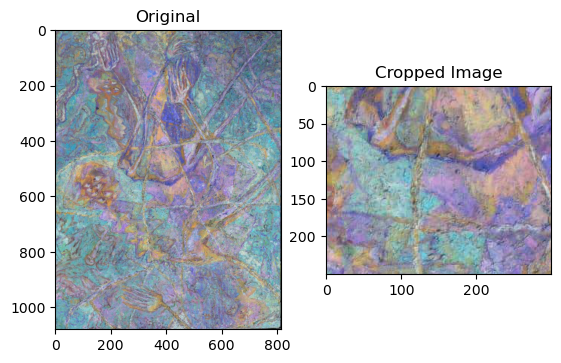

Invalid input


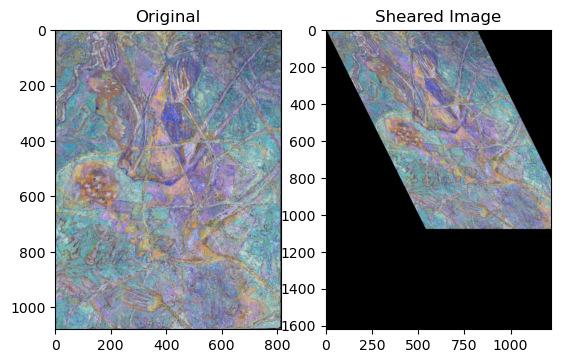

: 

In [10]:
classes_db = ["aj", "david", "fatima",  "francis", "kaobimdi",  "lotanna", "oyinda", "sophia", "wendy", "zion"]
password_db = [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010]

img_directory1 = os.path.abspath("museum/contemporary")
img_directory2 = os.path.abspath("museum/modern")
img_directory3 = os.path.abspath("museum/Traditional")
cont_pics = os.listdir(img_directory1)
modern_pics = os.listdir(img_directory2)
trad_pics = os.listdir(img_directory3)

print('Welcome Visitor')
email = input("Enter a valid email: ")


if isValidEmail(email):    

    print(f"Welcome again visitor with email {email}!") 
    age = input("Please put in your age: ")
    if int(age) > 18:
        print("You are old enough to browse the museum!")
        choice = input("What art type would you like to see? 1: Contemporary, 2: Modern, 3: Traditional")
        if int(choice) == 1:
            selectedImage = random.choice(cont_pics)
            selected_path = os.path.join(img_directory1, selectedImage)
            print(selected_path)
            selected = cv.imread(selected_path)
            translate(selected)
            reflect(selected)
            rotate(selected)
            cropped(selected)
            shear(selected)
            blur(selected)
        elif int(choice) == 2:
            selectedImage = random.choice(modern_pics)
            selected_path = os.path.join(img_directory2, selectedImage)
            selected = cv.imread(selected_path)
            translate(selected)
            reflect(selected)
            rotate(selected)
            cropped(selected)
            shear(selected)
            blur(selected)
        elif int(choice) == 3:
            selectedImage = random.choice(trad_pics)
            selected_path = os.path.join(img_directory3, selectedImage)
            selected = cv.imread(selected_path)
            translate(selected)
            reflect(selected)
            rotate(selected)
            cropped(selected)
            shear(selected)
            blur(selected)
        else:
            print('Invalid input')
    else:
        print("You are not old enough to browse the museum!")

else:
    print("You have an invalid email")